## 1. Which Company is Good to invest?

### 1-1. Import Libraries

In [2]:
# import libraries to get financial statement data
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of stock symbols to analyze (NASDAQ 100)
import requests


In [283]:
def get_symbols(region='us', sector='Technology', peer_group='Software & Services'):
    # Get software & services tickers from Yahoo Finance
    query = yf.EquityQuery('and',[
    yf.EquityQuery('EQ',['region', region]),
    yf.EquityQuery('EQ',['sector', sector]),
    yf.EquityQuery('EQ',['peer_group', peer_group])
    ])

    offset = 0
    size = 250
    res = yf.screen(query=query, offset=0, size=250, sortAsc=True)
    df_symbols = pd.DataFrame(res['quotes'])[['symbol','shortName']]

    if res['total'] > size:
        for i in range(res['total']//size):
            offset += size
            res = yf.screen(query=query, offset=offset, size=size, sortAsc=True)
            df_symbols = pd.concat([df_symbols, pd.DataFrame(res['quotes'])[['symbol','shortName']]])

    df_symbols.reset_index(drop=True, inplace=True) 
    return df_symbols

# Function to get financial data
def get_financial_data(symbol):
    stock = yf.Ticker(symbol)
    
    # Get financial statements
    balance_sheet = stock.balance_sheet
    income_stmt = stock.income_stmt
    cash_flow = stock.cashflow
    
    return {
        'balance_sheet': balance_sheet,
        'income_stmt': income_stmt,
        'cash_flow': cash_flow
    }


def get_valuation_multiples(symbol):
    def safe_get(info_dict, key):
        try:
            result = info_dict.get(key)
            if result is None:
                print(f"Warning: {key} returned None")
            return result
        except:
            print(f"Error getting {key}")
            return None
            
    def safe_ratio(info_dict, numerator_key, denominator_key):
        try:
            numerator = safe_get(info_dict, numerator_key)
            denominator = safe_get(info_dict, denominator_key)
            if numerator is None or denominator is None:
                print(f"Warning: Could not calculate ratio {numerator_key}/{denominator_key} - numerator or denominator is None")
                return None
            if denominator == 0:
                print(f"Warning: Could not calculate ratio {numerator_key}/{denominator_key} - denominator is 0")
                return None
            return numerator / denominator
        except:
            print(f"Error calculating ratio {numerator_key}/{denominator_key}")
            return None

    # Get info and initialize multiples dict
    info = yf.Ticker(symbol).info
    multiples = {}

    # Direct values
    multiples['PER'] = safe_get(info, 'trailingPE')
    multiples['PBR'] = safe_get(info, 'priceToBook')
    multiples['EV/Revenue'] = safe_get(info, 'enterpriseToRevenue')
    multiples['EV/EBITDA'] = safe_get(info, 'enterpriseToEbitda')
    multiples['PEG'] = safe_get(info, 'trailingPegRatio')
    multiples['Profit Margin'] = safe_get(info, 'profitMargins')
    multiples['Operating Margin'] = safe_get(info, 'operatingMargins')
    multiples['ROA'] = safe_get(info, 'returnOnAssets')
    multiples['ROE'] = safe_get(info, 'returnOnEquity')
    multiples['Beta'] = safe_get(info, 'beta')
    multiples['Debt/Equity'] = safe_get(info, 'debtToEquity')

    # Calculated ratios
    multiples['Cash/Revenue'] = safe_ratio(info, 'totalCash', 'totalRevenue')
    multiples['Debt/Revenue'] = safe_ratio(info, 'totalDebt', 'totalRevenue')

    return multiples


In [273]:
df_symbols = get_symbols()

In [377]:
df_symbols

,symbol,shortName
0,ABLGF,ALTEN SA
1,ACIW,"ACI Worldwide, Inc."
2,ACN,Accenture plc
3,ADBE,Adobe Inc.
4,ADP,"Automatic Data Processing, Inc."
...,...,...
334,YOU,"Clear Secure, Inc."
335,ZETA,Zeta Global Holdings Corp.
336,ZI,ZoomInfo Technologies Inc.
337,ZM,"Zoom Communications, Inc."


In [284]:
# Create empty list to store results
results = []

# Iterate through each symbol
for idx, row in df_symbols.iterrows():
    # Get valuation multiples for current symbol
    multiples = get_valuation_multiples(row['symbol'])
    
    # Combine symbol, shortname and multiples into dict
    result_dict = {
        'symbol': row['symbol'],
        'shortName': row['shortName']
    }
    result_dict.update(multiples)
    
    # Append to results list
    results.append(result_dict)
    
    # Print progress
    print(f"Processed {idx+1}/{len(df_symbols)} symbols")

# Create dataframe from results
df_results = pd.DataFrame(results)
df_results

Processed 1/339 symbols
Processed 2/339 symbols
Processed 3/339 symbols
Processed 4/339 symbols
Processed 5/339 symbols
Processed 6/339 symbols
Processed 7/339 symbols
Processed 8/339 symbols
Processed 9/339 symbols
Processed 10/339 symbols
Processed 11/339 symbols
Processed 12/339 symbols
Processed 13/339 symbols
Processed 14/339 symbols
Processed 15/339 symbols
Processed 16/339 symbols
Processed 17/339 symbols
Processed 18/339 symbols
Processed 19/339 symbols
Processed 20/339 symbols
Processed 21/339 symbols
Processed 22/339 symbols
Processed 23/339 symbols
Processed 24/339 symbols
Processed 25/339 symbols
Processed 26/339 symbols
Processed 27/339 symbols
Processed 28/339 symbols
Processed 29/339 symbols
Processed 30/339 symbols
Processed 31/339 symbols
Processed 32/339 symbols
Processed 33/339 symbols
Processed 34/339 symbols
Processed 35/339 symbols
Processed 36/339 symbols
Processed 37/339 symbols
Processed 38/339 symbols
Processed 39/339 symbols
Processed 40/339 symbols
Processed

,symbol,shortName,PER,PBR,EV/Revenue,EV/EBITDA,PEG,Profit Margin,Operating Margin,ROA,ROE,Beta,Debt/Equity,Cash/Revenue,Debt/Revenue
0,ABLGF,ALTEN SA,15.257048,1.448910,0.793,8.755,NaN,0.04499,0.09264,0.06294,0.08780,1.379,16.776,0.069534,0.089453
1,ACIW,"ACI Worldwide, Inc.",28.712042,4.052616,4.097,18.087,NaN,0.12740,0.27214,0.06141,0.14780,1.130,68.165,0.135731,0.608984
2,ACN,Accenture plc,25.192244,6.540076,2.851,16.705,2.3860,0.11430,0.13474,0.11576,0.26965,1.315,26.706,0.126381,0.119907
3,ADBE,Adobe Inc.,25.12335,12.652226,7.326,18.633,1.2443,0.30635,0.37854,0.17194,0.47284,1.492,50.118,0.337433,0.297817
4,ADP,"Automatic Data Processing, Inc.",31.071648,21.065159,6.183,20.997,3.2600,0.19791,0.29550,0.05571,0.76289,0.749,74.577,0.132686,0.216145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,YOU,"Clear Secure, Inc.",16.121796,12.358722,2.577,14.788,NaN,0.22022,0.16570,0.06746,0.74205,1.222,50.960,0.791053,0.157374
335,ZETA,Zeta Global Holdings Corp.,None,4.773203,2.857,3118.238,0.5884,-0.04818,-0.04902,-0.02806,-0.11934,1.292,30.525,0.338904,0.192084
336,ZI,ZoomInfo Technologies Inc.,112.5,1.817815,3.550,17.489,NaN,0.02396,0.26237,0.01865,0.01526,1.007,82.008,0.130446,1.143704
337,ZM,"Zoom Communications, Inc.",24.370718,2.676909,3.462,17.232,NaN,0.21654,0.17600,0.04868,0.11917,0.665,0.721,1.670093,0.013811


In [297]:
df_results_womissing = df_results.dropna().reset_index(drop=True)
df_results_womissing

,symbol,shortName,PER,PBR,EV/Revenue,EV/EBITDA,PEG,Profit Margin,Operating Margin,ROA,ROE,Beta,Debt/Equity,Cash/Revenue,Debt/Revenue
0,ACN,Accenture plc,25.192244,6.540076,2.851,16.705,2.3860,0.11430,0.13474,0.11576,0.26965,1.315,26.706,0.126381,0.119907
1,ADBE,Adobe Inc.,25.12335,12.652226,7.326,18.633,1.2443,0.30635,0.37854,0.17194,0.47284,1.492,50.118,0.337433,0.297817
2,ADP,"Automatic Data Processing, Inc.",31.071648,21.065159,6.183,20.997,3.2600,0.19791,0.29550,0.05571,0.76289,0.749,74.577,0.132686,0.216145
3,ADSK,"Autodesk, Inc.",54.685547,22.860058,9.837,41.394,1.6547,0.18137,0.23673,0.08526,0.49687,1.498,97.634,0.307617,0.417387
4,ADYYF,Adyen N.V.,48.783627,12.145360,20.663,43.607,2.1337,0.45917,0.47113,0.05356,0.25064,1.943,5.394,4.957592,0.113285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,UBER,"Uber Technologies, Inc.",18.482456,8.240931,4.126,51.312,50.1040,0.22411,0.06439,0.03890,0.56004,1.366,50.881,0.158648,0.260039
72,VRNT,Verint Systems Inc.,17.134615,1.248511,1.956,12.340,0.6113,0.09048,0.21590,0.03197,0.06406,1.270,33.895,0.238731,0.494187
73,WDAY,"Workday, Inc.",128.18556,7.331800,7.281,74.538,1.0736,0.06228,0.07191,0.01812,0.06146,1.322,37.215,0.949207,0.398058
74,WNS,WNS (Holdings) Limited,16.08895,3.106427,2.111,11.989,1.3033,0.12936,0.14660,0.07415,0.21217,0.964,52.274,0.200624,0.333029


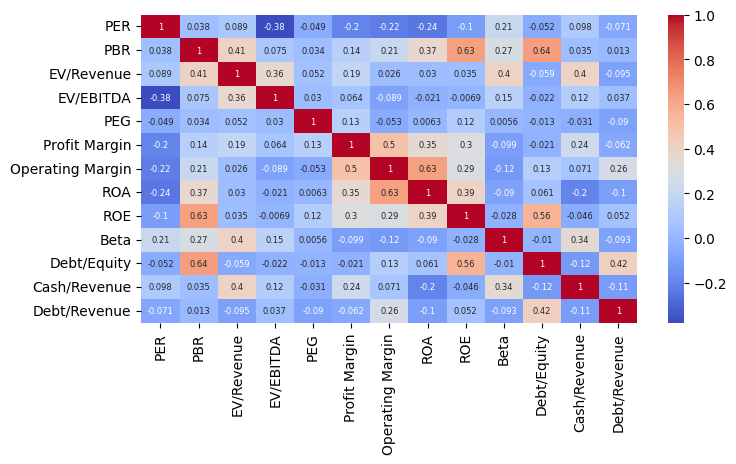

In [376]:
#load library to visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

#visualize correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(df_results_womissing.iloc[:,2:].corr(), annot=True, cmap='coolwarm', annot_kws={'size': 6})
plt.show()

In [310]:
# Find multiples with correlation < 0.1 (low correlation)
low_corr = abs(df_results_womissing.iloc[:,2:].corr()) < 0.1

# Initialize list to store independent multiples
independent_multiples = []

# Start with first multiple
remaining_cols = list(low_corr.columns)
current_col = remaining_cols[0]
independent_multiples.append(current_col)
remaining_cols.remove(current_col)

# Find additional multiples that are uncorrelated with all selected ones
while remaining_cols:
    for col in remaining_cols[:]:
        # Check if column is uncorrelated with all selected multiples
        is_independent = True
        for selected in independent_multiples:
            if not low_corr.loc[selected, col]:
                is_independent = False
                break
                
        if is_independent:
            independent_multiples.append(col)
            remaining_cols.remove(col)
            
    # If no more independent multiples found, break
    if not any(col in remaining_cols for col in independent_multiples):
        break

print("Independent multiples with no correlation to each other:")
print(independent_multiples)

low_corr

Independent multiples with no correlation to each other:
['PER', 'PBR', 'PEG', 'Cash/Revenue']


,PER,PBR,EV/Revenue,EV/EBITDA,PEG,Profit Margin,Operating Margin,ROA,ROE,Beta,Debt/Equity,Cash/Revenue,Debt/Revenue
PER,False,True,True,False,True,False,False,False,False,False,True,True,True
PBR,True,False,False,True,True,False,False,False,False,False,False,True,True
EV/Revenue,True,False,False,False,True,False,True,True,True,False,True,False,True
EV/EBITDA,False,True,False,False,True,True,True,True,True,False,True,False,True
PEG,True,True,True,True,False,False,True,True,False,True,True,True,True
Profit Margin,False,False,False,True,False,False,False,False,False,True,True,False,True
Operating Margin,False,False,True,True,True,False,False,False,False,False,False,True,False
ROA,False,False,True,True,True,False,False,False,False,True,True,False,False
ROE,False,False,True,True,False,False,False,False,False,True,False,True,True
Beta,False,False,False,False,True,True,False,True,True,False,True,False,True


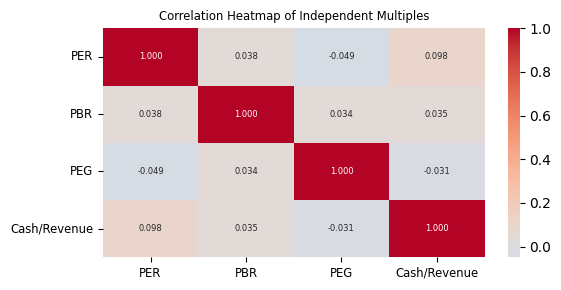

In [319]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_results_womissing[independent_multiples].corr(), 
            annot=True, 
            cmap='coolwarm',
            center=0,
            fmt='.3f',
            annot_kws={'size': 6})
plt.title('Correlation Heatmap of Independent Multiples', size='small')
plt.xticks(size='small')
plt.yticks(size='small')
plt.tight_layout()
plt.show()

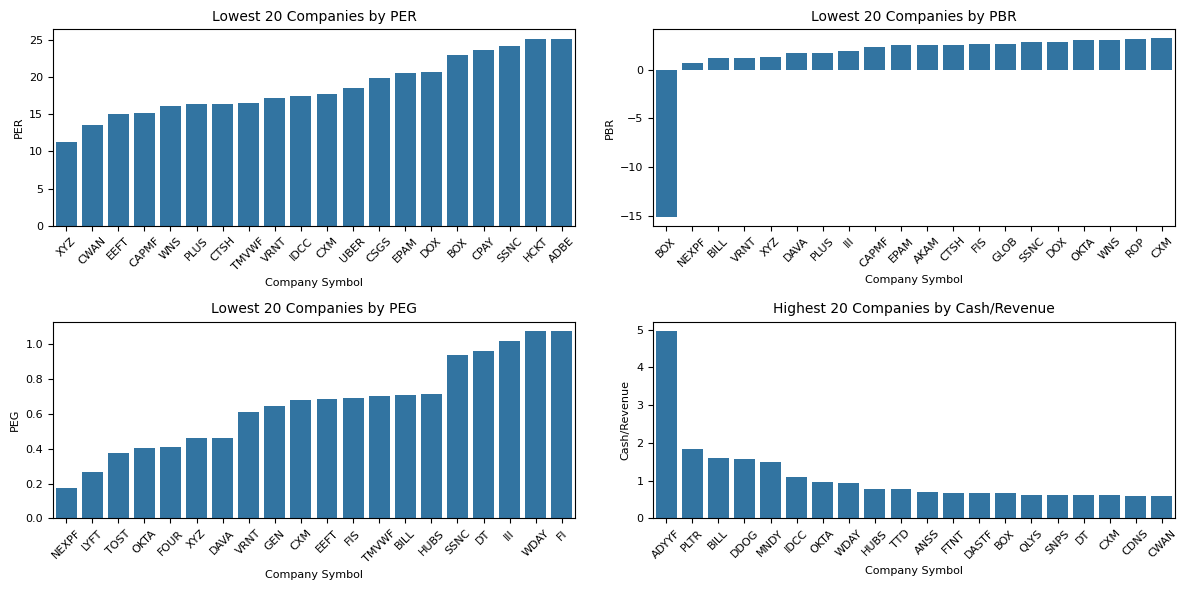

In [324]:
# Create 2x2 subplots
n_metrics = len(independent_multiples)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

# Plot bar chart for each metric
for i, metric in enumerate(independent_multiples):
    if i >= 4:  # Only show first 4 metrics
        break
        
    # Sort data by metric and get top 20 companies
    # Sort ascending for all metrics except Cash/Revenue
    ascending = True if metric != 'Cash/Revenue' else False
    data = df_results_womissing.sort_values(by=metric, ascending=ascending).head(20)
    
    # Create bar plot
    sns.barplot(data=data, x='symbol', y=metric, ax=axes[i])
    
    # Customize plot
    sort_direction = "Lowest" if ascending else "Highest"
    axes[i].set_title(f'{sort_direction} 20 Companies by {metric}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].set_xlabel('Company Symbol', fontsize=8)
    axes[i].set_ylabel(metric, fontsize=8)

plt.tight_layout()
plt.show()


In [380]:
df_results[df_results['symbol'] == 'BOX']

,symbol,shortName,PER,PBR,EV/Revenue,EV/EBITDA,PEG,Profit Margin,Operating Margin,ROA,ROE,Beta,Debt/Equity,Cash/Revenue,Debt/Revenue
42,BOX,"Box, Inc.",22.92647,-15.128578,4.588,59.094,5.8009,0.2244,0.06417,0.03422,1.89402,0.962,378.52,0.663055,0.684991



Top 10 Companies Based on Multiple Analysis:
symbol                       shortName        PER      PBR    PEG  Cash/Revenue  avg_rank
   XYZ                     Block, Inc.   11.29369 1.336954 0.4629      0.314005     11.75
  EEFT         Euronet Worldwide, Inc.  15.075556 3.614792 0.6880      0.517229     14.25
   CXM                  Sprinklr, Inc.  17.636364 3.238731 0.6807      0.607060     14.75
  VRNT             Verint Systems Inc.  17.134615 1.248511 0.6113      0.238731     16.25
 NEXPF                        NEXI SPA   38.03125 0.684169 0.1744      0.433611     16.75
  IDCC              InterDigital, Inc.  17.478874 5.849392 1.3395      1.083155     19.50
  AKAM       Akamai Technologies, Inc.   25.24159 2.538365 1.1269      0.400029     20.00
  BILL             BILL Holdings, Inc.  116.15385 1.212300 0.7089      1.593247     21.50
    DT                 Dynatrace, Inc.  29.974998 5.622509 0.9620      0.616574     22.75
  CWAN Clearwater Analytics Holdings,   13.605882 5.02

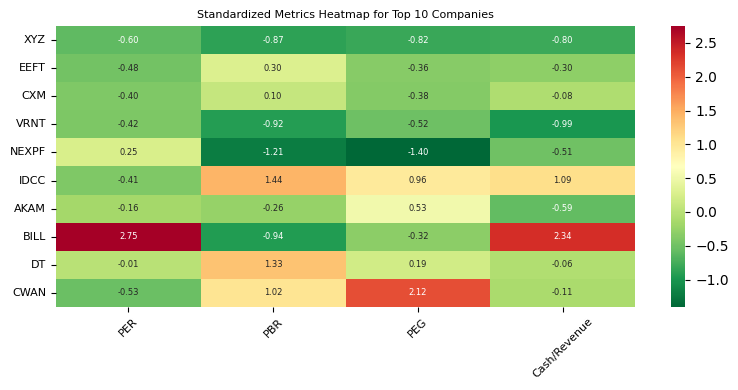

In [342]:
# Create a scoring system based on multiple rankings
# For each multiple, rank companies from 1-n (n being total companies)
# Lower values are better for all metrics EXCEPT Cash/Revenue where higher is better

scoring_metrics = independent_multiples.copy()
df_scores = df_results_womissing.copy()

for metric in scoring_metrics:
    # For all metrics except Cash/Revenue, lower is better so ascending=True
    # For Cash/Revenue, higher is better so ascending=False
    ascending = False if metric == 'Cash/Revenue' else True
    
    # Rank companies for this metric (1 is best)
    df_scores[f'{metric}_rank'] = df_scores[metric].rank(ascending=ascending)

# Calculate average rank across all metrics
rank_columns = [col for col in df_scores.columns if col.endswith('_rank')]
df_scores['avg_rank'] = df_scores[rank_columns].mean(axis=1)

# Sort by average rank and get top 10 companies
top_10_companies = df_scores.sort_values('avg_rank').head(10)

# Display results with key metrics
display_columns = ['symbol', 'shortName'] + independent_multiples + ['avg_rank']
print("\nTop 10 Companies Based on Multiple Analysis:")
print(top_10_companies[display_columns].to_string(index=False))

# Create visualization of the top 10 companies' metrics
plt.figure(figsize=(8, 4))

# Plot heatmap of metrics for top 10 companies
metrics_data = top_10_companies[independent_multiples]
metrics_data = (metrics_data - metrics_data.mean()) / metrics_data.std()  # Standardize for better visualization

# Convert metrics_data to numeric values and handle any non-numeric values
metrics_data = metrics_data.apply(pd.to_numeric, errors='coerce')

# Create heatmap only if data is numeric
if not metrics_data.isna().all().all():
    sns.heatmap(metrics_data, 
                annot=True, 
                cmap='RdYlGn_r',
                xticklabels=independent_multiples,
                yticklabels=top_10_companies['symbol'],
                fmt='.2f',
                annot_kws={'size': 6})  # Smaller annotation font size

    plt.title('Standardized Metrics Heatmap for Top 10 Companies', fontsize=8)
    plt.xticks(fontsize=8, rotation=45)  # Smaller x-axis labels
    plt.yticks(fontsize=8)  # Smaller y-axis labels
    plt.tight_layout()
    plt.show()
else:
    print("Error: No numeric data available for heatmap visualization")


In [348]:
df_scores[independent_multiples + [col for col in df_scores.columns if col.endswith('_rank')]]

,PER,PBR,PEG,Cash/Revenue,PER_rank,PBR_rank,PEG_rank,Cash/Revenue_rank,avg_rank
0,25.192244,6.540076,2.3860,0.126381,21.0,35.0,59.0,59.0,43.50
1,25.12335,12.652226,1.2443,0.337433,20.0,55.0,28.0,32.0,33.75
2,31.071648,21.065159,3.2600,0.132686,30.0,68.0,68.0,58.0,56.00
3,54.685547,22.860058,1.6547,0.307617,55.0,70.0,41.0,36.0,50.50
4,48.783627,12.145360,2.1337,4.957592,52.0,54.0,52.0,1.0,39.75
...,...,...,...,...,...,...,...,...,...
71,18.482456,8.240931,50.1040,0.158648,12.0,47.0,76.0,52.0,46.75
72,17.134615,1.248511,0.6113,0.238731,9.0,4.0,8.0,44.0,16.25
73,128.18556,7.331800,1.0736,0.949207,67.0,40.0,19.0,8.0,33.50
74,16.08895,3.106427,1.3033,0.200624,5.0,18.0,30.0,49.0,25.50


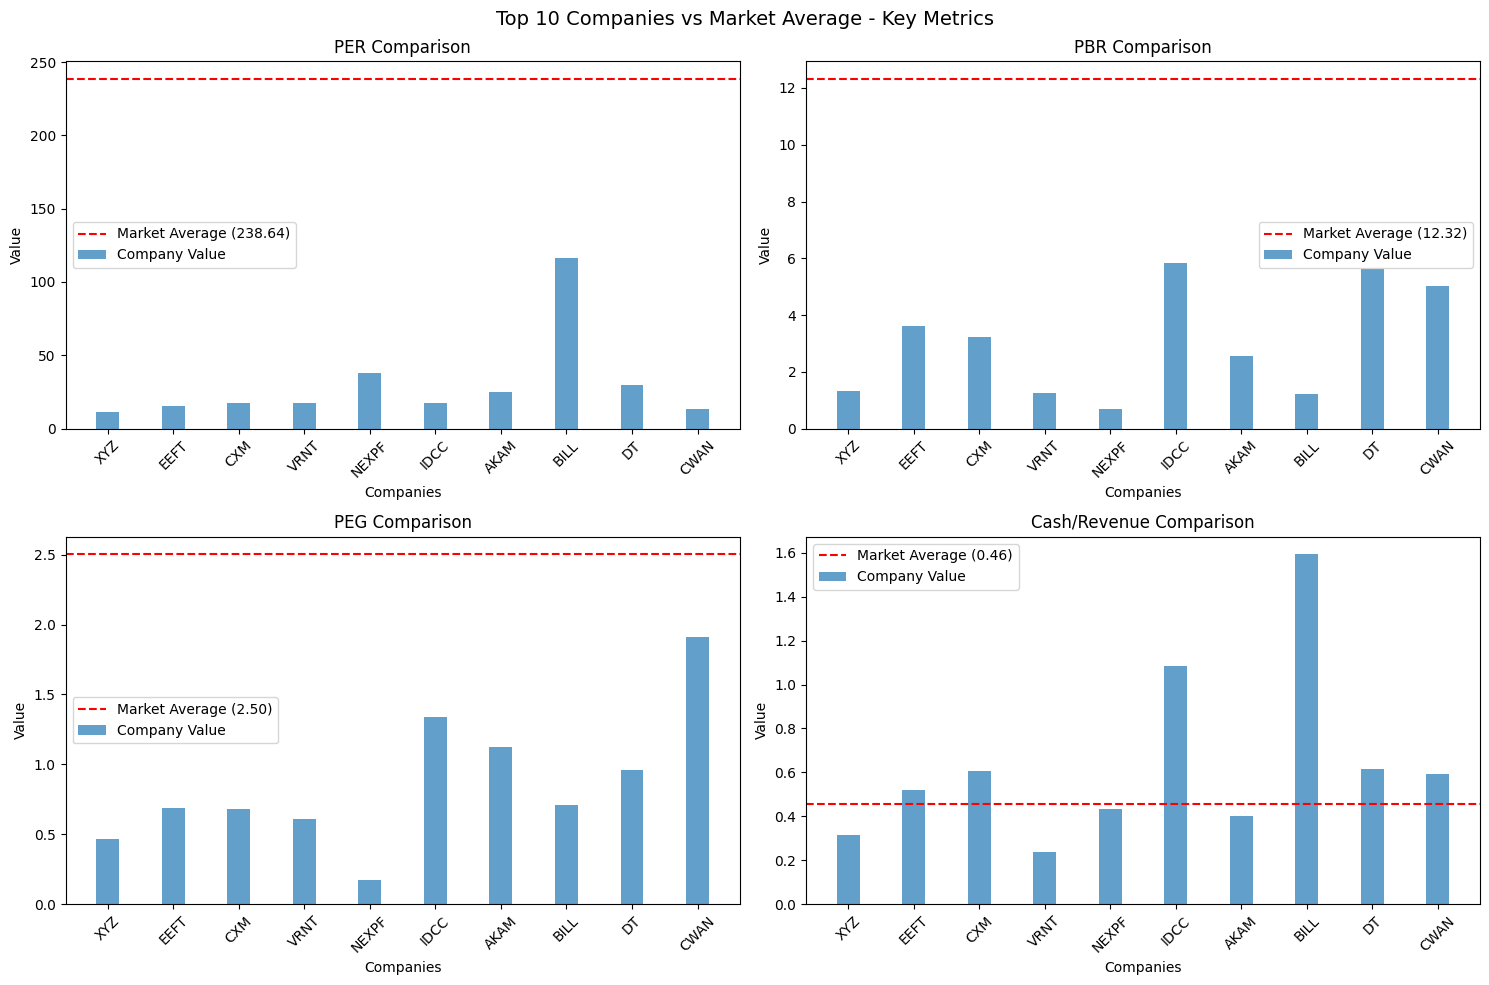


Numerical Comparison with Market Averages:
             Market Average Top 10 Average
PER               238.64229      30.162667
PBR               12.323605       3.037398
PEG                2.503005        0.86693
Cash/Revenue       0.455829       0.639794


In [350]:
# Calculate average scores across all companies for comparison
avg_scores = df_scores[independent_multiples].mean()

# Create figure with multiple subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot each independent multiple as a bar chart
for i, metric in enumerate(independent_multiples):
    ax = axes[i]
    x = np.arange(len(top_10_companies['symbol']))
    width = 0.35
    
    # Plot company values
    ax.bar(x, top_10_companies[metric], width, label='Company Value', alpha=0.7)
    
    # Plot market average as horizontal line
    ax.axhline(y=avg_scores[metric], color='r', linestyle='--', 
               label=f'Market Average ({avg_scores[metric]:.2f})')
    
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Companies')
    ax.set_ylabel('Value')
    ax.set_xticks(x)
    ax.set_xticklabels(top_10_companies['symbol'], rotation=45)
    ax.legend()

plt.suptitle('Top 10 Companies vs Market Average - Key Metrics', fontsize=14)
plt.tight_layout()
plt.show()

# Print numerical comparison
comparison = pd.DataFrame({
    'Market Average': avg_scores,
    'Top 10 Average': top_10_companies[independent_multiples].mean()
})
print("\nNumerical Comparison with Market Averages:")
print(comparison.round(3))


In [365]:
# Calculate average Cash/Revenue score
avg_cash_revenue = df_scores['Cash/Revenue'].mean()

# Filter companies with above average Cash/Revenue and sort by Cash/Revenue score
top_cash_companies = df_scores[df_scores['Cash/Revenue'] > avg_cash_revenue] \
    .sort_values('Cash/Revenue', ascending=False)

# Get the corresponding company details
top_cash_details = top_10_companies[top_10_companies['symbol'].isin(top_cash_companies.symbol)]

# Display results
print("Top 10 Companies with Above Average Cash/Revenue Ratio:")
display(top_cash_details[['symbol', 'shortName'] +independent_multiples])

Top 10 Companies with Above Average Cash/Revenue Ratio:


,symbol,shortName,PER,PBR,PEG,Cash/Revenue
26,EEFT,"Euronet Worldwide, Inc.",15.075556,3.614792,0.6880,0.517229
20,CXM,"Sprinklr, Inc.",17.636364,3.238731,0.6807,0.607060
40,IDCC,"InterDigital, Inc.",17.478874,5.849392,1.3395,1.083155
9,BILL,"BILL Holdings, Inc.",116.15385,1.212300,0.7089,1.593247
25,DT,"Dynatrace, Inc.",29.974998,5.622509,0.9620,0.616574
19,CWAN,"Clearwater Analytics Holdings,",13.605882,5.028261,1.9147,0.594296


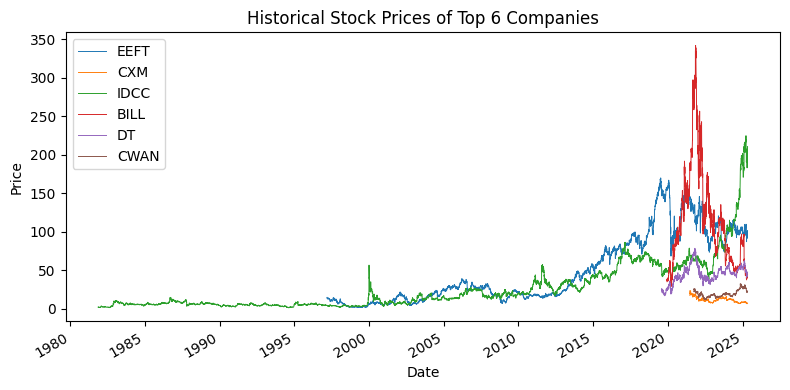

In [375]:
# Plot historical prices for top 6 companies
plt.figure(figsize=(8,4))
for symbol in top_cash_details['symbol'][:6]:
    yf.Ticker(symbol).history(period='max')['Close'].plot(label=symbol, linewidth=0.7)
plt.title('Historical Stock Prices of Top 6 Companies')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()